In [6]:
import numpy as np
import pandas as pd

np.random.seed(42)

size = np.random.randint(500,5000,1000)
bedrooms = np.random.randint(1,6,1000)
location = np.random.randint(1,11,1000)
age = np.random.randint(1,51,1000)

price = (size*300) + (bedrooms*50000) + (location*20000) - (age*2000) + np.random.randint(-20000,20000,1000)

df = pd.DataFrame({'size':size,'bedrooms':bedrooms,'location':location,'age':age,'price':price})
csv_filename = "house_price_data.csv"
df.to_csv(csv_filename,index = False)

print(f"Dataset saved as '{csv_filename}' with {df.shape[0]} rows and {df.shape[1]} columns.")

Dataset saved as 'house_price_data.csv' with 1000 rows and 5 columns.


In [7]:
df.describe()

,size,bedrooms,location,age,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,5.440000,25.505000,1.052217e+06
std,1255.514921,1.427564,2.811459,14.401159,3.819883e+05
min,503.000000,1.000000,1.000000,1.000000,1.536800e+05
25%,1749.500000,2.000000,3.000000,13.000000,7.344078e+05
50%,2862.500000,3.000000,5.000000,26.000000,1.060323e+06
75%,3849.500000,4.000000,8.000000,38.000000,1.358930e+06
max,4999.000000,5.000000,10.000000,50.000000,1.872087e+06


In [8]:
df.shape

(1000, 5)

In [9]:
df = pd.read_csv("house_price_data.csv")

In [10]:
df.head()

,size,bedrooms,location,age,price
0,1360,2,4,23,534625
1,4272,3,2,15,1455997
2,3592,1,6,27,1199849
3,966,1,2,11,339161
4,4926,2,7,50,1623949


In [11]:
df.isnull().sum()

,0
size,0
bedrooms,0
location,0
age,0
price,0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-13-1ca734e8407a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


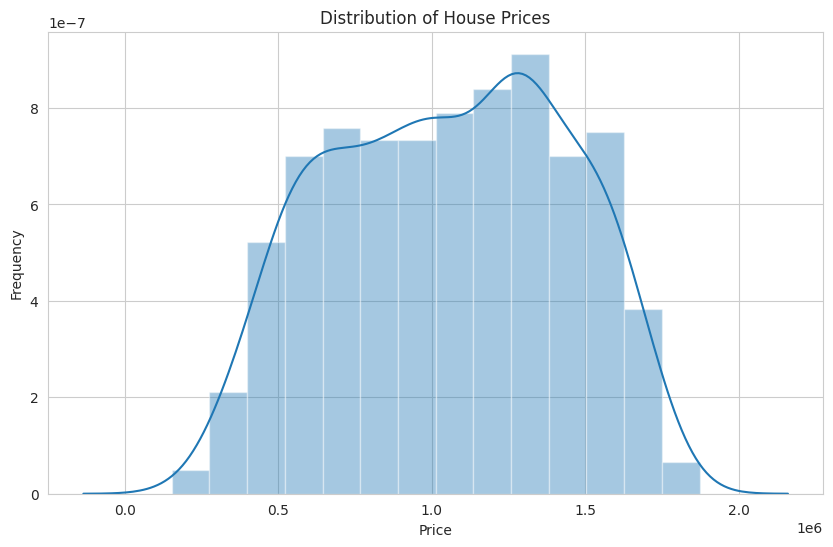

In [13]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.distplot(df['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

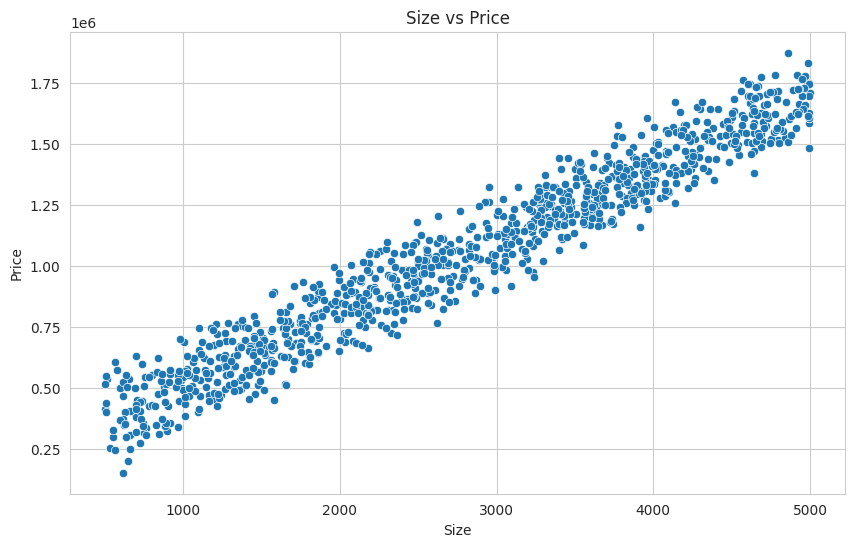

In [14]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.scatterplot(x='size',y='price',data=df)
plt.xlabel('Size')
plt.ylabel('Price')
plt.title('Size vs Price')
plt.show()

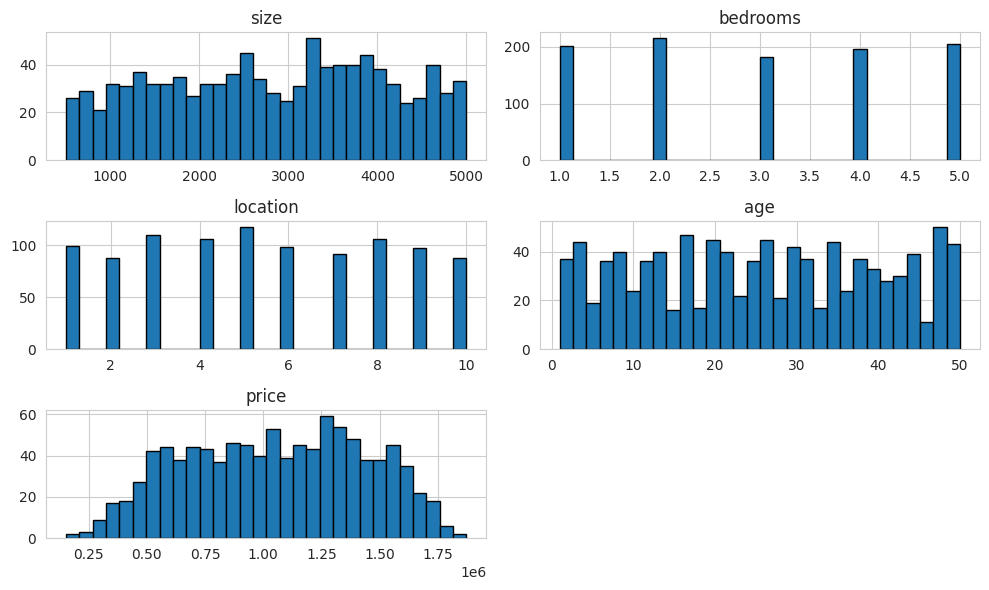

In [15]:
sns.set_style('whitegrid')
df.hist(figsize=(10,6), bins=30,edgecolor='black')
plt.tight_layout()
plt.show()

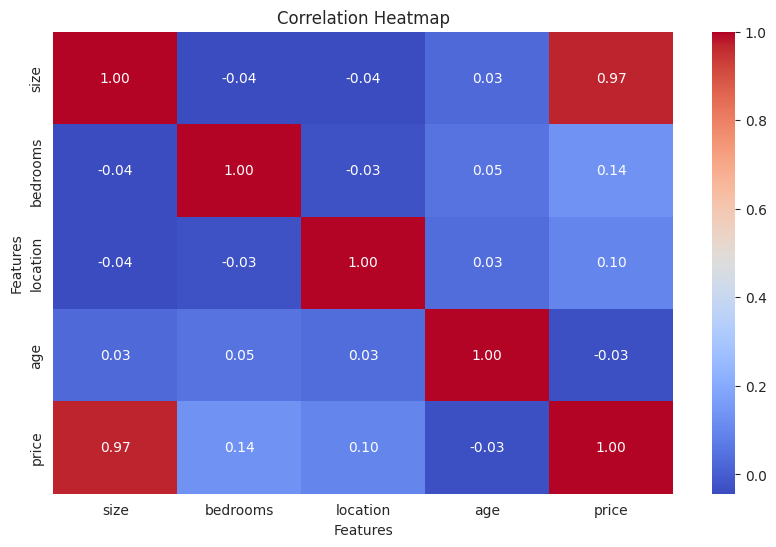

In [16]:
# Correlation Heatmap
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [18]:
x= df.drop('price',axis=1)
y= df['price']

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [21]:
y_pred = model.predict(x_test)

In [22]:
from sklearn.metrics import mean_absolute_error


In [23]:
mae = mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 9731.147529877839


In [24]:
r2 = r2_score(y_test,y_pred)
print("R-squared:",r2)

R-squared: 0.9991518235784612


In [25]:
mse = mean_squared_error(y_test,y_pred)
print("Mean Squared Error:",mse)

Mean Squared Error: 125357963.68297364


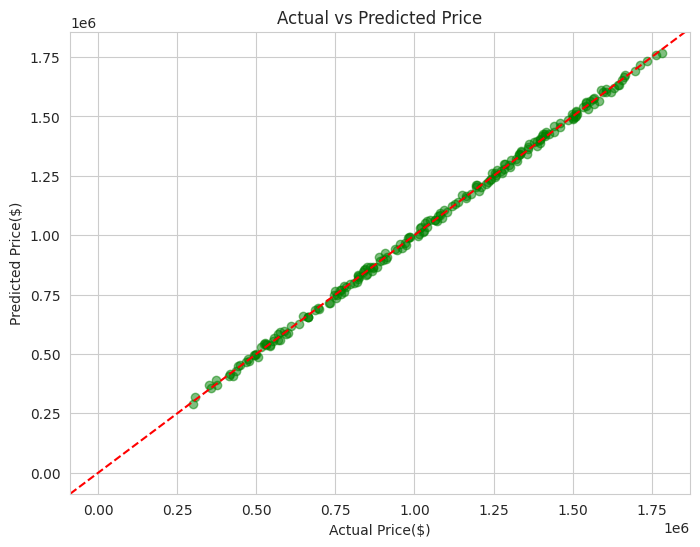

In [26]:
# Actual vs Predicted Value Graph
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,alpha=0.5,color='green')
plt.xlabel('Actual Price($)')
plt.ylabel('Predicted Price($)')
plt.title('Actual vs Predicted Price')
plt.axline(xy1=(0,0),slope=1,color='red',linestyle='--')
plt.show()